In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('/content/diabetes.csv')

In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv('/content/diabetes.csv')

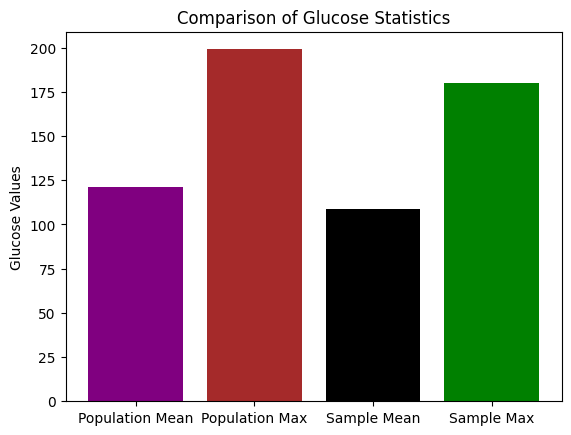

In [12]:
np.random.seed(678)
sample = data.sample(25)

pop_mean_glucose = data['Glucose'].mean()
pop_max_glucose = data['Glucose'].max()
sam_mean_glucose = sample['Glucose'].mean()
sam_max_glucose = sample['Glucose'].max()

# Plotting a bar chart for comparison
labels = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
value = [pop_mean_glucose, pop_max_glucose, sam_mean_glucose, sam_max_glucose]
plt.bar(labels, value, color=['purple', 'brown', 'black', 'green'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()

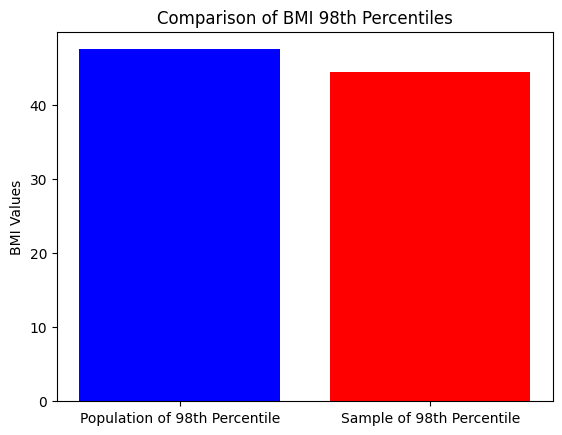

In [13]:
pop_percent = np.percentile(data['BMI'], 98)
sam_percent = np.percentile(sample['BMI'], 98)

labels = ['Population of 98th Percentile', 'Sample of 98th Percentile']
value = [pop_percent, sam_percent]
plt.bar(labels, value, color=['blue', 'red'])
plt.title('Comparison of BMI 98th Percentiles')
plt.ylabel('BMI Values')
plt.show()

In [15]:
bootstrap_sample_size = 500
sample_size = 150

bootstrap_mean = np.zeros(bootstrap_sample_size)
bootstrap_std_dev = np.zeros(bootstrap_sample_size)
bootstrap_percentile = np.zeros(bootstrap_sample_size)

for i in range(bootstrap_sample_size):
    bootstrap_sample = data['BloodPressure'].sample(sample_size, replace=True)
    bootstrap_mean[i] = bootstrap_sample.mean()
    bootstrap_std_dev[i] = bootstrap_sample.std()
    bootstrap_percentile[i] = np.percentile(bootstrap_sample, 98)

pop_mean = data['BloodPressure'].mean()
pop_std_dev = data['BloodPressure'].std()
pop_percentile = np.percentile(data['BloodPressure'], 98)

bootstrap_mean=np.mean(bootstrap_mean)
bootstrap_sd=np.mean(bootstrap_std_dev)
bootstrap_percentile=np.mean(bootstrap_percentile)

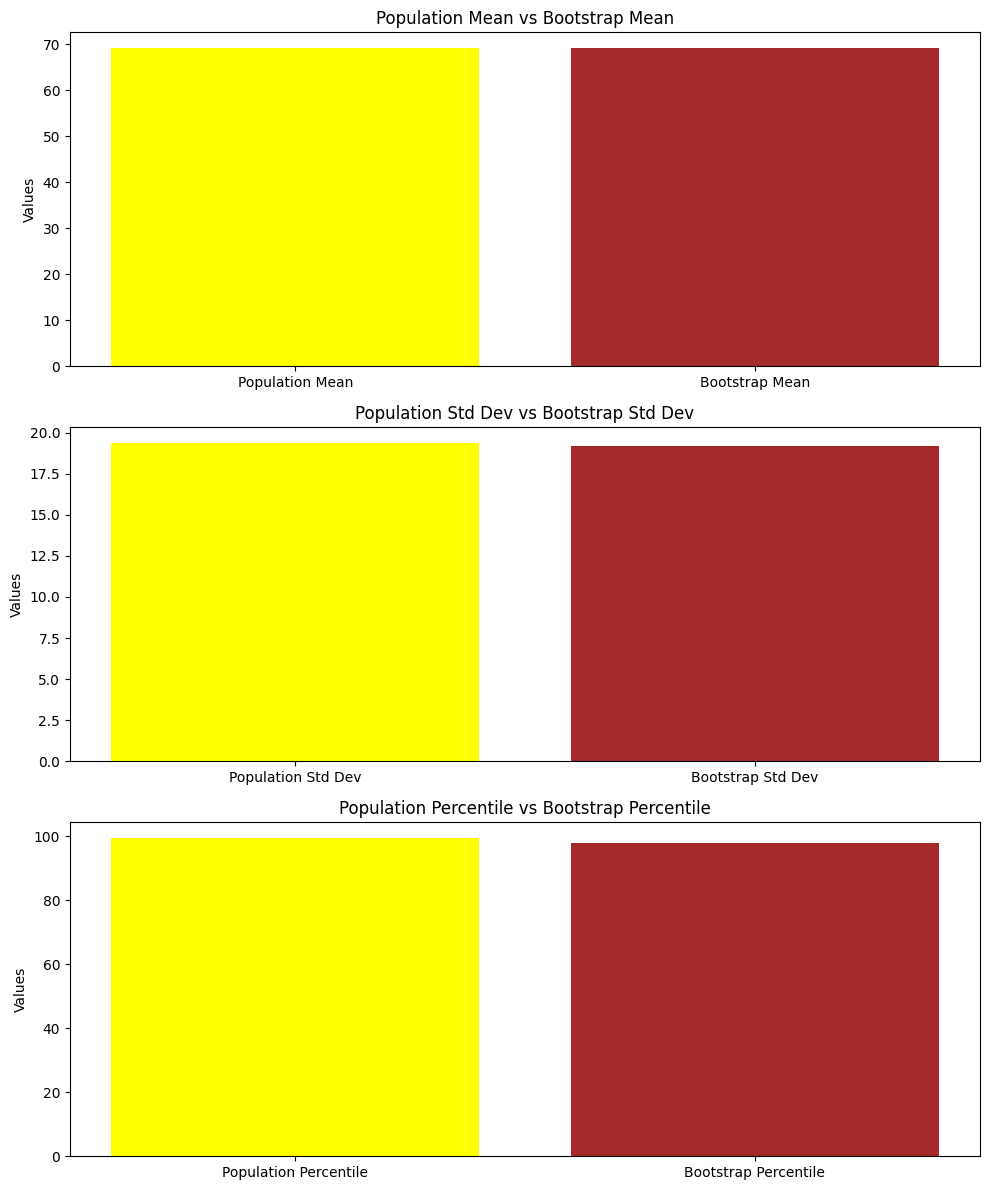

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))


axs[0].bar(['Population Mean', 'Bootstrap Mean'], [pop_mean, bootstrap_mean], color=['yellow', 'brown'])
axs[0].set_ylabel('Values')
axs[0].set_title('Population Mean vs Bootstrap Mean')


axs[1].bar(['Population Std Dev', 'Bootstrap Std Dev'], [pop_std_dev, bootstrap_sd], color=['yellow', 'brown'])
axs[1].set_ylabel('Values')
axs[1].set_title('Population Std Dev vs Bootstrap Std Dev')


axs[2].bar(['Population Percentile', 'Bootstrap Percentile'], [pop_percentile, bootstrap_percentile], color=['yellow', 'brown'])
axs[2].set_ylabel('Values')
axs[2].set_title('Population Percentile vs Bootstrap Percentile')

plt.tight_layout()
plt.show()